# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [2]:
from sklearn.datasets import make_moons, make_circles
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt
import numpy as np

from mlxtend.plotting import plot_decision_regions

Let's generate our dataset and take a look on it.

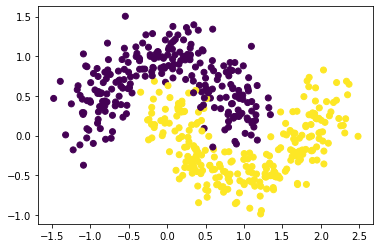

In [3]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [20]:
lr = LogisticRegression(C=0.5, penalty='l1', solver='saga', tol=1e-3, max_iter=500) # add some params
svm = SVC(C=0.5, kernel='linear') # here too

lr.fit(moons_points, moons_labels)
svm.fit(moons_points, moons_labels)

SVC(C=0.5, kernel='linear')

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


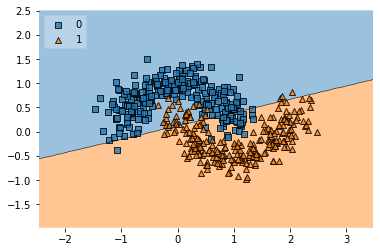

In [21]:
plot_decision_regions(moons_points, moons_labels, clf=lr, legend=2)

In [28]:
print(f'Accuracy: {accuracy_score(moons_labels, lr.predict(moons_points))}')
print(f'F1-score: {f1_score(moons_labels, lr.predict(moons_points))}')

Accuracy: 0.86
F1-score: 0.8588709677419355


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


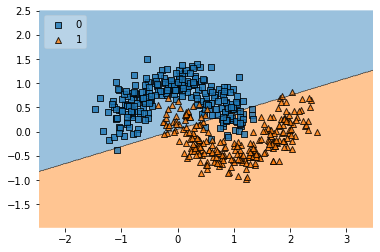

In [24]:
plot_decision_regions(moons_points, moons_labels, clf=svm, legend=2)

In [27]:
print(f'Accuracy: {accuracy_score(moons_labels, svm.predict(moons_points))}')
print(f'F1-score: {f1_score(moons_labels, svm.predict(moons_points))}')

Accuracy: 0.854
F1-score: 0.8525252525252526


Так как сгенерированные данные не являются линейно разделимыми, то совершенно очевдно, что алгоритмы, которые пытаются разделить данные некоторой гиперплоскостью покажут не самые хорошие результаты.

## 1.2 Kernel trick

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

In [31]:
grid={"C": np.linspace(0.1, 1, 10), "degree": np.arange(1, 10, 1), "gamma": np.linspace(0.1, 1, 10)}
svc=SVC(kernel='poly')
svc_cv=GridSearchCV(svc, grid, cv=10)
svc_cv.fit(moons_points, moons_labels)

GridSearchCV(cv=10, estimator=SVC(kernel='poly'),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'degree': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [32]:
svc_cv.best_params_

{'C': 0.6, 'degree': 3, 'gamma': 1.0}

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


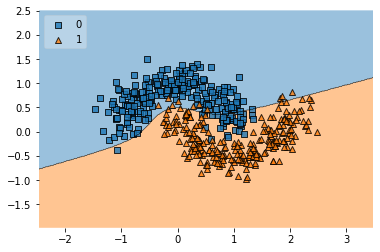

In [33]:
plot_decision_regions(moons_points, moons_labels, clf=svc_cv, legend=2)

In [34]:
print(f'Accuracy: {accuracy_score(moons_labels, svc_cv.predict(moons_points))}')
print(f'F1-score: {f1_score(moons_labels, svc_cv.predict(moons_points))}')

Accuracy: 0.906
F1-score: 0.9101338432122371


In [35]:
grid={"C": np.linspace(0.1, 1, 10), "degree": np.arange(1, 10, 1), "gamma": np.linspace(0.1, 1, 10)}
svc=SVC(kernel='rbf')
svc_cv=GridSearchCV(svc, grid, cv=10)
svc_cv.fit(moons_points, moons_labels)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'degree': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [36]:
svc_cv.best_params_

{'C': 0.7000000000000001, 'degree': 1, 'gamma': 1.0}

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


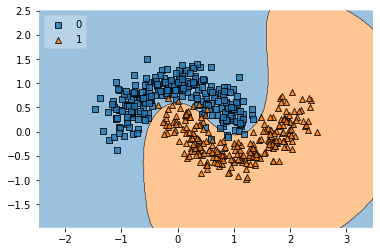

In [37]:
plot_decision_regions(moons_points, moons_labels, clf=svc_cv, legend=2)

In [38]:
print(f'Accuracy: {accuracy_score(moons_labels, svc_cv.predict(moons_points))}')
print(f'F1-score: {f1_score(moons_labels, svc_cv.predict(moons_points))}')

Accuracy: 0.976
F1-score: 0.9759036144578314


In [39]:
grid={"C": np.linspace(0.1, 1, 10), "degree": np.arange(1, 10, 1), "gamma": np.linspace(0.1, 1, 10)}
svc=SVC(kernel='sigmoid')
svc_cv=GridSearchCV(svc, grid, cv=10)
svc_cv.fit(moons_points, moons_labels)

GridSearchCV(cv=10, estimator=SVC(kernel='sigmoid'),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'degree': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [40]:
svc_cv.best_params_

{'C': 0.5, 'degree': 1, 'gamma': 0.1}

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


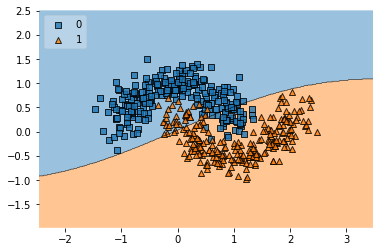

In [41]:
plot_decision_regions(moons_points, moons_labels, clf=svc_cv, legend=2)

In [42]:
print(f'Accuracy: {accuracy_score(moons_labels, svc_cv.predict(moons_points))}')
print(f'F1-score: {f1_score(moons_labels, svc_cv.predict(moons_points))}')

Accuracy: 0.848
F1-score: 0.8486055776892429


Наилучшие результаты показал `rbf kernel`, что видно и по метрикам классификации (мы получили 97,6% accuracy), так и по границам регионов на графике.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [44]:
moons_points_pf = PolynomialFeatures(degree=3).fit_transform(moons_points)

In [45]:
lr_pf = LogisticRegression(C=0.5, penalty='l1', solver='saga', tol=1e-3, max_iter=500) # add some params

lr_pf.fit(moons_points_pf, moons_labels)


LogisticRegression(C=0.5, max_iter=500, penalty='l1', solver='saga', tol=0.001)

In [47]:
print(f'Accuracy: {accuracy_score(moons_labels, lr_pf.predict(moons_points_pf))}')
print(f'F1-score: {f1_score(moons_labels, lr_pf.predict(moons_points_pf))}')

Accuracy: 0.97
F1-score: 0.969939879759519


Качество полученное с помощью LR при использовании дополнтельных сгенерированных фичей очень близко к тому, что мы получили, применяя SVM с rbf-kernel.

По сути, добавляя нелинейность в сами данные, используя дополнительные фичи, мы можем применять линейные алгоритмы для того, чтобы разделять линейно не разделимые данные.

Наилучшие результаты показал `PolynomialFeatures` с параметром `degree=3`. 

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

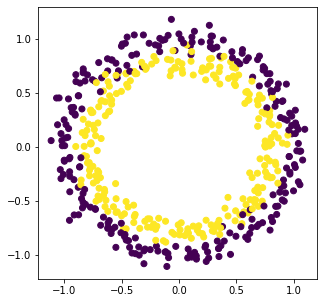

In [49]:
circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

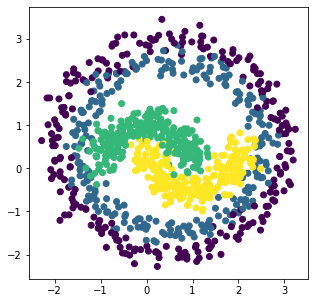

In [50]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

In [51]:
grid={"C": np.linspace(0.1, 1, 10), "degree": np.arange(1, 10, 1), "gamma": np.linspace(0.1, 1, 10)}
svc=SVC(kernel='rbf')
svc_cv=GridSearchCV(svc, grid, cv=10)
svc_cv.fit(points, labels)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'degree': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


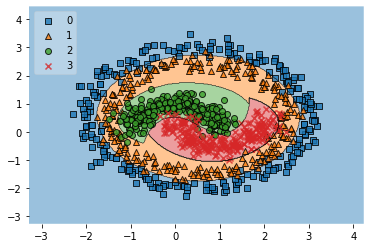

In [52]:
plot_decision_regions(points, labels, clf=svc_cv, legend=2)

In [53]:
print(f'Accuracy: {accuracy_score(labels, svc_cv.predict(points))}')
print(f'F1-score: {f1_score(labels, svc_cv.predict(points), average="weighted")}')

Accuracy: 0.935
F1-score: 0.9351341046528303


In [72]:
points_pf = PolynomialFeatures(degree=3).fit_transform(points)

In [73]:
grid={"C": np.linspace(0.1, 1, 10), "penalty": ['l1', 'l2']}
lr_pf = LogisticRegression(solver='saga', tol=1e-3, max_iter=500) 
lr_pf_cv=GridSearchCV(lr_pf, grid, cv=10)
lr_pf_cv.fit(points_pf, labels)

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=500, solver='saga',
                                          tol=0.001),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'penalty': ['l1', 'l2']})

In [74]:
print(f'Accuracy: {accuracy_score(labels, lr_pf_cv.predict(points_pf))}')
print(f'F1-score: {f1_score(labels, lr_pf_cv.predict(points_pf), average="weighted")}')

Accuracy: 0.901
F1-score: 0.9009428338100908


Применим `SVM` с `rbf-kernel`. Получаем accuracy, равную 93.5%, что достаточно высоко для такого рода данных.
Сравним также с методом `LR`, применённой к `PolynomialFeatures`. В этом случае accuracy получилась несколько ниже, а именно 90.1%.